In [1]:
from matplotlib import colormaps, pyplot as plt
import numpy as np

from carpy.physicalchem import UnreactiveFluidModel, species
from carpy.physicalchem import (
    IdealGas, VanderWaals as VdW, RedlichKwong as RK, SoaveRedlichKwong as SRK,
    SRKmodPeneloux as SRKmP, PengRobinson as PR
)

In [2]:
equations_of_state = (IdealGas, VdW, RK, SRK, SRKmP, PR)

In [3]:
fluid_model = UnreactiveFluidModel()
fluid_model.X = {species.water(): 1.0}

Computing parameters of Water...IdealGas, VanderWaals, RedlichKwong, SoaveRedlichKwong, SRKmodPeneloux, PengRobinson, done!


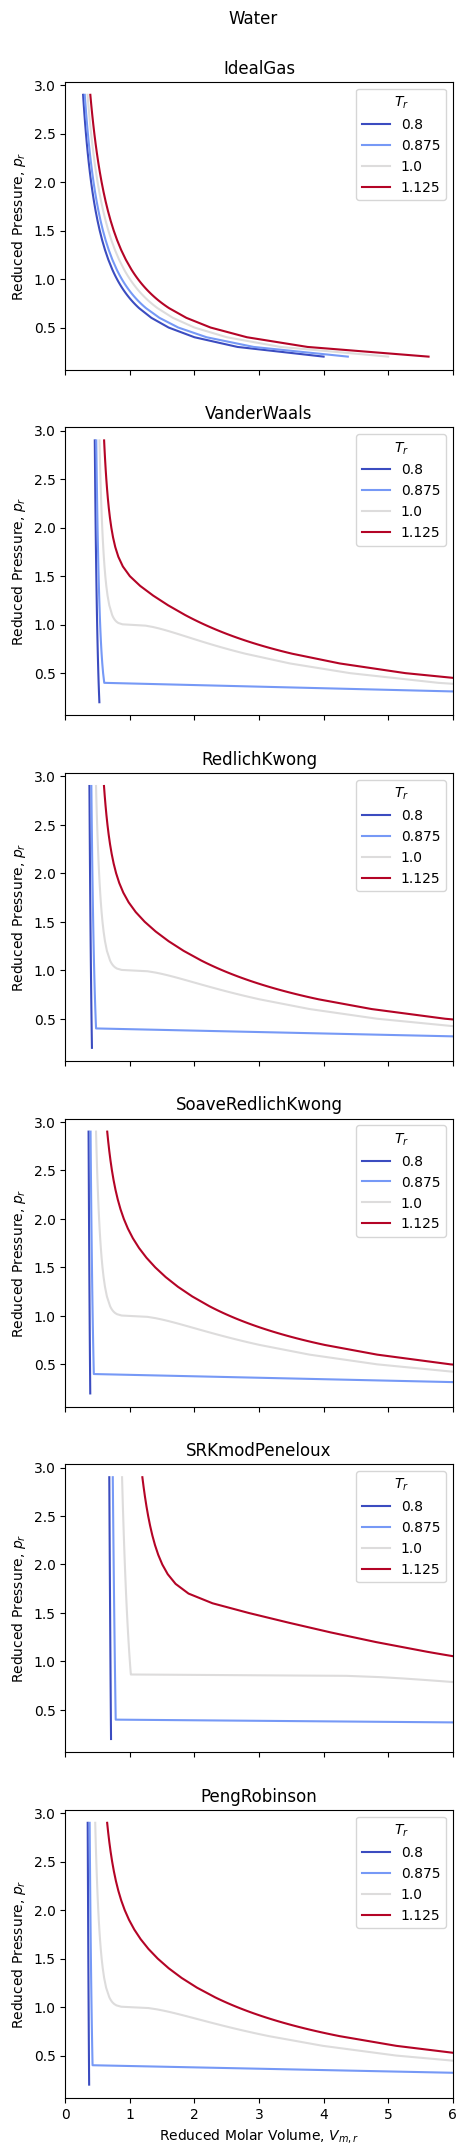

In [4]:
T_rs = np.array([0.8, 0.875, 1, 1.125])
hi_res_zone = np.linspace(0.7, 1.1, 30)
p_rs = np.hstack((
    np.arange(0.2, hi_res_zone.min(), 0.1),
    hi_res_zone,
    np.arange(hi_res_zone.max(), 3, 0.1)
))

cmap = colormaps.get_cmap("coolwarm")

def get_colour(x):
    """Get (R, G, B, A) scaled with reduced temperature array, such that T_r=1.0 corresponds to white."""
    y = np.interp(x, (T_rs.min(), 1.0, T_rs.max()), (0, 0.5, 1.0))
    c = cmap(y)
    return c


n_models = len(equations_of_state)
fig, axs = plt.subplots(n_models, sharex=True, figsize=(5, 4*n_models))
fig.subplots_adjust(top=0.95)
fig.suptitle("Water")

print(f"Computing parameters of Water", end="...")

for i, eos in enumerate(equations_of_state):

    print(f"{eos.__name__}", end=", ")

    mygas = UnreactiveFluidModel(eos_class=eos)
    mygas.X = {species.water(): 1.0}
    
    for T_r in T_rs:

        ps = mygas.EOS.p_c * p_rs
        T = mygas.EOS.T_c * T_r
        Vms = mygas.molar_volume(p=ps, T=T)
        Vm_rs = Vms / mygas.EOS.Vm_c

        axs[i].plot(Vm_rs, p_rs, label=f"{T_r}", c=get_colour(T_r))

    # print(mygas.EOS.Vm_r(Vm=mygas.molar_volume(p=101325, T=273.15)), mygas.EOS.p_r(p=101325))
    # axs[i].scatter(mygas.EOS.Vm_r(Vm=mygas.molar_volume(p=101325, T=273.15)), mygas.EOS.p_r(p=101325), s=80, marker="X")
    
    axs[i].set_title(eos.__name__)
    axs[i].set_ylabel("Reduced Pressure, $p_r$")
    axs[i].legend(title="$T_r$", loc="upper right")
    axs[i].set_xlim(0, 6)


print("done!")

axs[i].set_xlabel("Reduced Molar Volume, $V_{m,r}$")
plt.show()

In [17]:
mygas = UnreactiveFluidModel(eos_class=SRKmodPeneloux)
mygas.X = {species.water(): 1}

NameError: name 'SRKmodPeneloux' is not defined

In [16]:
mygas.density(p=101325, T=20)

Quantity([849.27480128], kg m^{-3})

In [12]:
species.water().

ChemicalSpecies(H2O)